<a href="https://colab.research.google.com/github/rockahominy/Small-Projects/blob/main/Breast_Cancer_Dataset_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rashka vs. Geron:
 Decision Trees 

Rashka's decision tree model differs from Geron's decision tree model (even though they are utilizing the same dataset) with respect to the parameter maximum depth of the trees. The former's decision tree has a maximum depth of four, which gave a more complex decision boundary than the latter's decision tree model (max depth 2). An increase in maximum depth of a decision tree results in more complex decision boundaries by dividing the feature space into separate rectangles. This can result in model overfitting. To remedy this overfitting phenomenon, it is recommended that the decision tree be pruned by setting a limit for the maximal depth parameter of the tree. Other differences between Rashka and Geron's methods include utilization of the partial dataset to train the model from the former and training the model with the whole dataset. In addition, Geron removed an outlier data point from the dataset to show that the decision tree is sensitive to outliers, but Rashka omitted this step. 

In [ ]:
###Getting the dataset####
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

In [ ]:
###The first five observations in the DataFrame###
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
###Number of observations (rows) and columns (features) in the dataset###
df.shape #569 observations #32 columns 

(569, 32)

In [ ]:
###Splitting the data###

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = df.iloc[:, 2:].values, df.iloc[:, 1].values #X all obs and index position 2 column and above 
#y all obs and column at index position 1

###Assign dummy variables###
le = LabelEncoder()
y = le.fit_transform(y)

le.classes_

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y, random_state=1) #testing dataset size is 30% of original dataset #train is 70%

In [ ]:
print(y_train)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=4),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [ ]:
###Standardizing the features###
import numpy as np 
import matplotlib.pyplot as plt

X_train_std = StandardScaler().fit_transform(X_train)
cov_mat = np.cov(X_train_std.T) #computes the covariance matrix of the standardized training dataset

###Obtain eigenpairs of the covariance matrix###
###Calculate Eigenpairs of the covariance matrix###
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #eigendecomposition

print('eigen_vals.shape:', eigen_vals.shape) #30
print('eigen_vecs.shape:', eigen_vecs.shape) #30x30 dimentional matrix 

eigen_vals.shape: (30,)
eigen_vecs.shape: (30, 30)


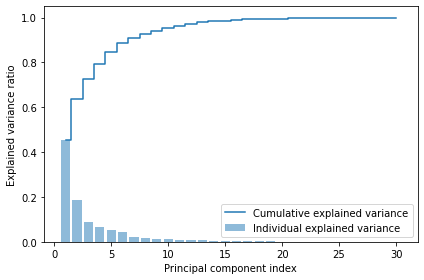

In [ ]:
###Explained variance ratio###
#reduce dimensionality of dataset by compressing it onto a new feature subspace
#can do above by: only selecting the subset of the eigenvectors (PC) that contain most of the information (variance)
#We are interested in the top k eigenvectors based on the values of their corresponding eigenvalues

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
           sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp) #calculates the cumulative sum of explained variances

plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')

plt.step(range(1, 31), cum_var_exp, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#first principal component alone accounts for almost 50% of the variance
#first and second principal components added together account for about 70%
#PCA is an unsupervised learning method and class labels are ignored

In [ ]:
#print(eigen_pairs) #first array used in the code cells below

In [ ]:
#print(eigen_pairs[0][1])

In [ ]:
#X_train_std[0].dot(w)

In [ ]:
#print(X_train_pca)

(30, 2)
Matrix W;
 [[-0.21679334 -0.23462306]
 [-0.10660312 -0.06849448]
 [-0.22557851 -0.2151757 ]
 [-0.21886594 -0.23224295]
 [-0.14066045  0.1848655 ]
 [-0.23936605  0.14475358]
 [-0.25444238  0.06573624]
 [-0.25775276 -0.03731318]
 [-0.14120408  0.18138941]
 [-0.07237829  0.3662257 ]
 [-0.20600989 -0.09883883]
 [-0.01378187  0.0763412 ]
 [-0.21367988 -0.07861921]
 [-0.20798454 -0.15183423]
 [-0.00307547  0.2049454 ]
 [-0.17102664  0.2377156 ]
 [-0.14768555  0.20931191]
 [-0.18439201  0.1409671 ]
 [-0.04163771  0.19936217]
 [-0.10122214  0.2828757 ]
 [-0.226975   -0.22124091]
 [-0.10755498 -0.06136208]
 [-0.23567844 -0.20066026]
 [-0.2237171  -0.22093973]
 [-0.12867934  0.15776067]
 [-0.21426764  0.13415898]
 [-0.2282569   0.09876787]
 [-0.24993858 -0.00967411]
 [-0.12582219  0.13847033]
 [-0.13879824  0.26770452]]


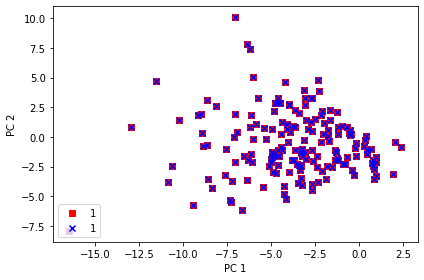

In [ ]:
###Feature Transformation###
#Transform the dataset onto the new principal component axes

#Make a list of eigenvalue and eigenvector tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

#sort the eigenvalue and eigenvector tuples from high to low

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print(w.shape)
print('Matrix W;\n', w)


X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], 
              c=c, label=1, marker=m)
  
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()  #Points showing in the scatterplot
#Why aren't the classes separating 

Data points more spread out in the x-axis (the first PCA) than the y-axis (the second PCA) which aligns with the PCA plot above.

The data points in Rashka's wine dataset showed class separation, while the dataset I am using here (Breast Cancer) does not show class separation in the plot above. With the code discussed in class, the scatterplot showed class separation, but it did not show as good class separation as seen in with the wine dataset. 

Can't discuss too much about the dimensionality of this dataset except the Breast Cancer dataset contains more dimensions (features) than the wine dataset. In class we discussed that the 6 or 7 features are neccessary for this model.
